# Single variable regression

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

We already know simple linear regression:

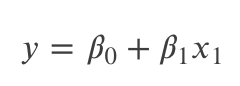

In polynomial regression of degree  𝑛 , we fit a curve of the form:

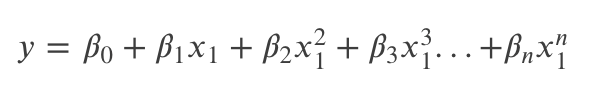

We are trying to fit our data using polynomial regression, and for each model, choosing the best degree

## First model: Gas price vs Amount of Electric cars

In [126]:
# import csv file
data = pd.read_csv('data_ml.csv')
data.head()

,year,co2_emissions,gdp,gas_price,ev
0,2001,1855.78,37133.62,1.460,20282
1,2002,1895.48,37997.76,1.386,36042
2,2003,1912.60,39490.27,1.603,47566
3,2004,1967.47,41724.63,1.895,84233
4,2005,1988.14,44123.41,2.314,205876


In [127]:
# filter only gas_price and ev
df = data.loc[:, ['gas_price', 'ev']]
df.head()

,gas_price,ev
0,1.460,20282
1,1.386,36042
2,1.603,47566
3,1.895,84233
4,2.314,205876


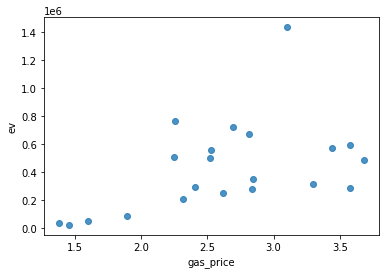

In [128]:
# visualise area-price relationship
sns.regplot(x="gas_price", y="ev", data=df, fit_reg=False)

In [129]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

14
7


In [130]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['gas_price']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['ev']

X_test = df_test['gas_price']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['ev']

X_plot = np.linspace(1, 4, 1000).reshape(-1, 1)

X_all = df["gas_price"].values.reshape(-1, 1)
y_all = df["ev"]

In [131]:
# fit multiple polynomial features
degrees = [1, 2, 3, 4, 6, 10]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))
y_plot_pred = np.zeros((len(X_plot), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    y_plot_pred[:, i] = model.predict(X_plot)

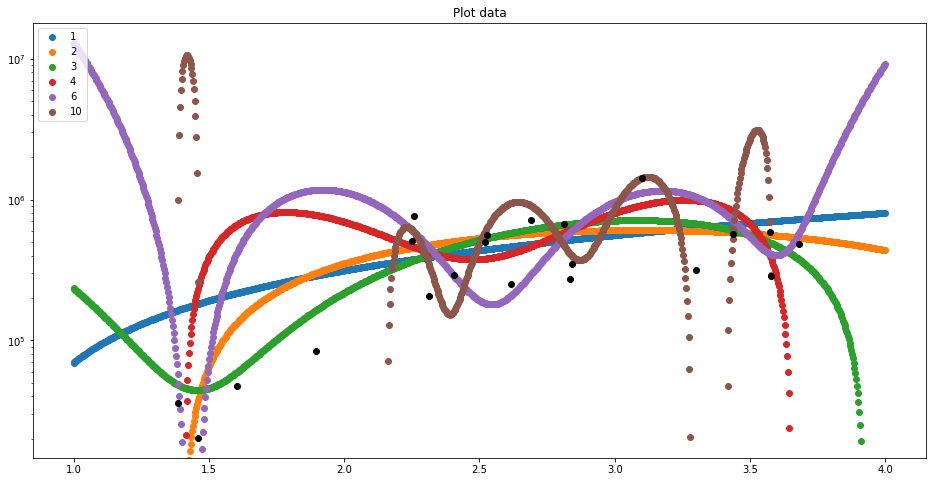

In [132]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

plt.yscale('log')
plt.title("Plot data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_plot, y_plot_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

plt.scatter(X_all, y_all, color = 'black')

In [133]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.22, test score=0.05
Polynomial degree 2: train score=0.31, test score=0.27
Polynomial degree 3: train score=0.35, test score=0.23
Polynomial degree 4: train score=0.5, test score=-4.4
Polynomial degree 6: train score=0.64, test score=-5.14
Polynomial degree 10: train score=0.9, test score=-26614.09


Therefore, we should use a polynomial regression model of degree 2 to fit the data <br>

And we know, as the gas price rises, more people are willing to choose electric cars.

In [134]:
# using all the data to train a polynomial regression of degree 2
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_all, y_all)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [135]:
# predicted when gas price is 4 dollar/gallon, how many electric cars will be bought in that year?
model.predict([[4]])[0]

393952.4320526805

## Second model: gdp vs amount of electric cars

In [137]:
# filter only gas_price and ev
df = data.loc[:, ['gdp', 'ev']]
df.head()

,gdp,ev
0,37133.62,20282
1,37997.76,36042
2,39490.27,47566
3,41724.63,84233
4,44123.41,205876


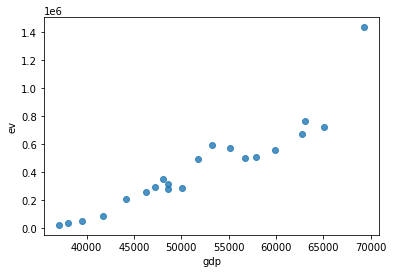

In [138]:
# visualise area-price relationship
sns.regplot(x="gdp", y="ev", data=df, fit_reg=False)

In [139]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

14
7


In [140]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['gdp']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['ev']

X_test = df_test['gdp']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['ev']

X_plot = np.linspace(30000, 70000, 10000).reshape(-1, 1)

X_all = df["gdp"].values.reshape(-1, 1)
y_all = df["ev"]

In [141]:
# fit multiple polynomial features
degrees = [1, 3, 6, 9, 10, 11, 12, 13, 15, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))
y_plot_pred = np.zeros((len(X_plot), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    y_plot_pred[:, i] = model.predict(X_plot)

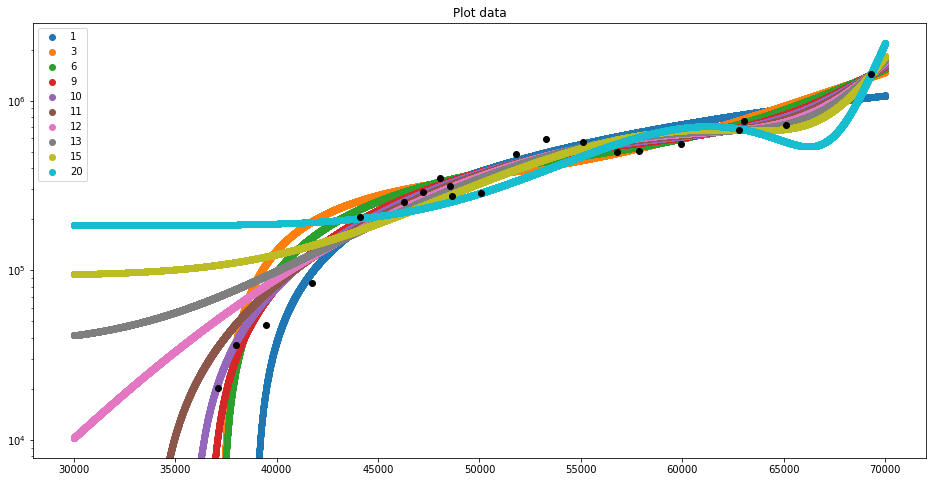

In [142]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

plt.yscale('log')
plt.title("Plot data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_plot, y_plot_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

plt.scatter(X_all, y_all, color = 'black')

In [143]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.84, test score=0.85
Polynomial degree 3: train score=0.95, test score=0.78
Polynomial degree 6: train score=0.97, test score=0.87
Polynomial degree 9: train score=0.97, test score=0.94
Polynomial degree 10: train score=0.97, test score=0.95
Polynomial degree 11: train score=0.97, test score=0.96
Polynomial degree 12: train score=0.97, test score=0.96
Polynomial degree 13: train score=0.96, test score=0.95
Polynomial degree 15: train score=0.95, test score=0.91
Polynomial degree 20: train score=0.91, test score=0.76


Therefore, we should use a polynomial regression model of degree 11 or 12 to fit the data <br>

And we know, as the gdp rises, more people are willing to choose electric cars.

In [144]:
# using all the data to train a polynomial regression of degree 12
model = make_pipeline(PolynomialFeatures(12), LinearRegression())
model.fit(X_all, y_all)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12)),
                ('linearregression', LinearRegression())])

In [145]:
# predicted when gas price is 80000 dollar, how many electric cars will be bought in that year?
model.predict([[80000]])[0]

26398875.483757935

## Third model, co2 emissions vs amount of electric cars 

In [148]:
# filter only gas_price and ev
df = data.loc[:, ['co2_emissions', 'ev']]
df.head()

,co2_emissions,ev
0,1855.78,20282
1,1895.48,36042
2,1912.60,47566
3,1967.47,84233
4,1988.14,205876


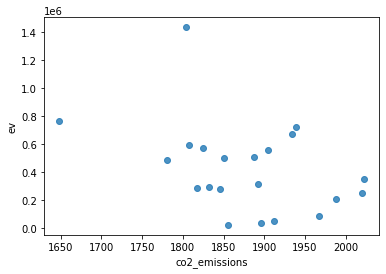

In [149]:
# visualise area-price relationship
sns.regplot(x="co2_emissions", y="ev", data=df, fit_reg=False)

In [150]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

14
7


In [151]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['co2_emissions']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['ev']

X_test = df_test['co2_emissions']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['ev']

X_plot = np.linspace(1500, 2100, 10000).reshape(-1, 1)

X_all = df["co2_emissions"].values.reshape(-1, 1)
y_all = df["ev"]

In [152]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 9, 10, 11, 12, 13, 15, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))
y_plot_pred = np.zeros((len(X_plot), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    y_plot_pred[:, i] = model.predict(X_plot)

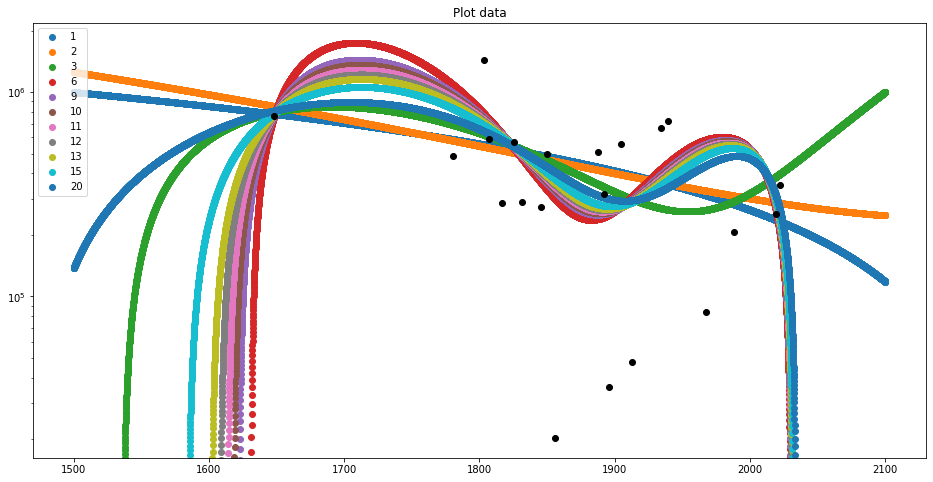

In [153]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

plt.yscale('log')
plt.title("Plot data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_plot, y_plot_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

plt.scatter(X_all, y_all, color = 'black')

In [154]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.14, test score=0.06
Polynomial degree 2: train score=0.15, test score=0.07
Polynomial degree 3: train score=0.18, test score=-0.04
Polynomial degree 6: train score=0.34, test score=-1.23
Polynomial degree 9: train score=0.3, test score=-0.85
Polynomial degree 10: train score=0.29, test score=-0.74
Polynomial degree 11: train score=0.28, test score=-0.65
Polynomial degree 12: train score=0.27, test score=-0.56
Polynomial degree 13: train score=0.26, test score=-0.49
Polynomial degree 15: train score=0.24, test score=-0.36
Polynomial degree 20: train score=0.21, test score=-0.14


Therefore, we should use a polynomial regression model of degree 2 to fit the data <br>

And we know, as the co2 emission goes lower, the amount of electric cars goes higher. 

This might show the contribution of electric cars to our environment.

In [155]:
# using all the data to train a polynomial regression of degree 2
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_all, y_all)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [156]:
# predicted when co2 emission is 2100 millions of metric tons, how many electric cars will be bought in that year?
model.predict([[2100]])[0]

216411.12990425527


# Multi variable regression (using Cross validation)

In [63]:
data.head()

,year,co2_emissions,gdp,gas_price,ev
0,2001,1855.78,37133.62,1.460,20282
1,2002,1895.48,37997.76,1.386,36042
2,2003,1912.60,39490.27,1.603,47566
3,2004,1967.47,41724.63,1.895,84233
4,2005,1988.14,44123.41,2.314,205876


In [64]:
del data["year"]

In [66]:
data.head()

,co2_emissions,gdp,gas_price,ev
0,1855.78,37133.62,1.460,20282
1,1895.48,37997.76,1.386,36042
2,1912.60,39490.27,1.603,47566
3,1967.47,41724.63,1.895,84233
4,1988.14,44123.41,2.314,205876


In [65]:
# train-test 70-30 split
df_train, df_test = train_test_split(data, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [67]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('ev')
X_train = df_train

y_test = df_test.pop('ev')
X_test = df_test

In [70]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003606,0.000762,0.001655,0.000329,1,{'n_features_to_select': 1},-1.197282,-0.274364,0.442134,-24.212177,...,-2792.196289,5571.779427,2,0.226485,0.403393,0.227529,0.341948,0.463922,0.332655,0.094493
1,0.004044,0.000925,0.002328,0.000917,2,{'n_features_to_select': 2},-1.197812,-0.258815,0.280187,-28.451362,...,-3545.708135,7076.610729,3,0.226486,0.404042,0.279048,0.355139,0.488005,0.350544,0.091958
2,0.002104,0.000162,0.001578,0.000318,3,{'n_features_to_select': 3},0.952845,0.930029,0.981428,-5.875598,...,-620.155441,1238.808058,1,0.919845,0.941033,0.911392,0.982896,0.967470,0.944527,0.027269


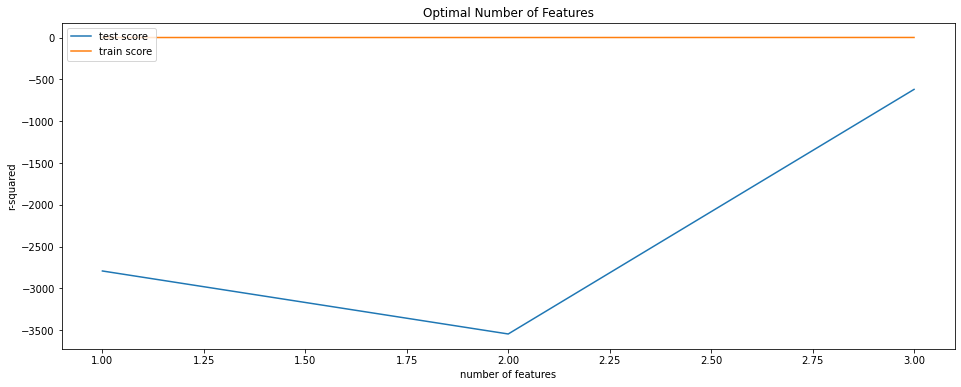

In [72]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

R squared is negative.

Therefore, no mather we choose 1 feature, 2 feature or 3 features, we cannot give a good model.

I think the reason is we are not having enough data.